### Priprava podatkov za obdelavo

In [1]:
from Classes import Data

data = Data()

### Računanje št. nesreč letal skozi leta

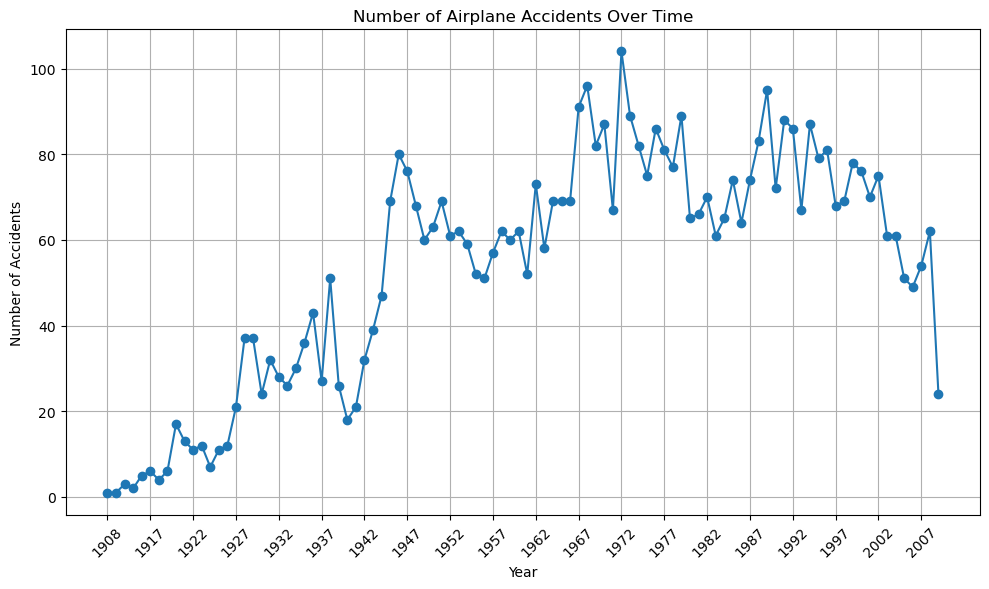

In [2]:
data.crashes_over_time()

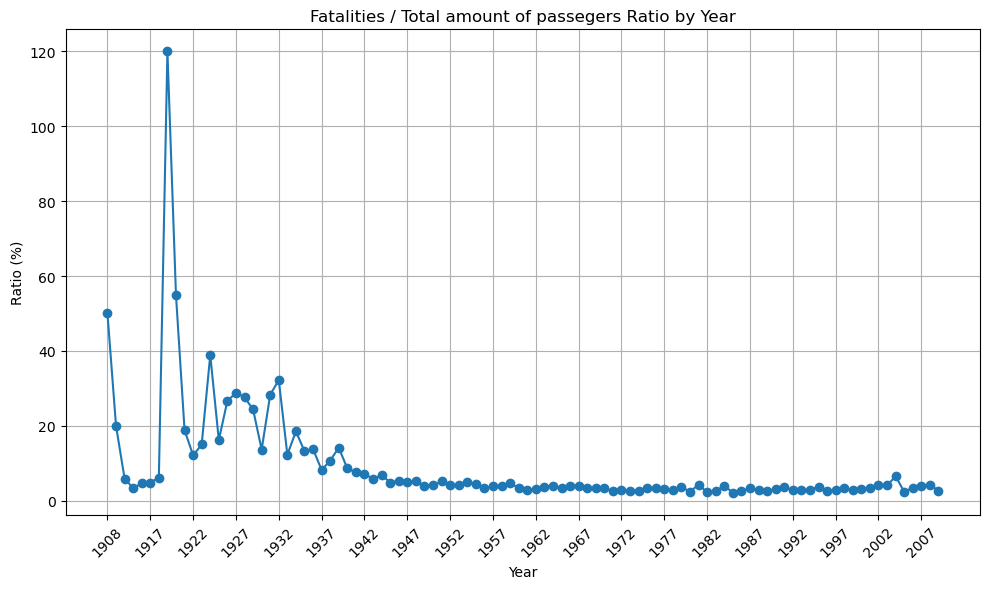

In [13]:
data.ratio_over_time()

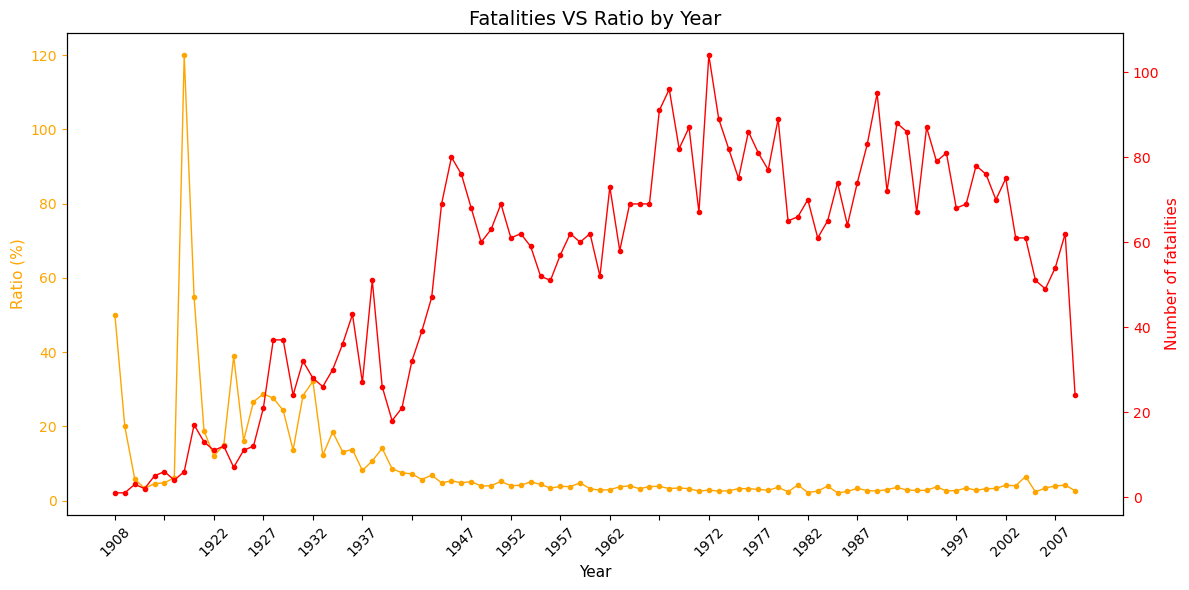

In [3]:
data.fatilities_vs_ratio()

Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


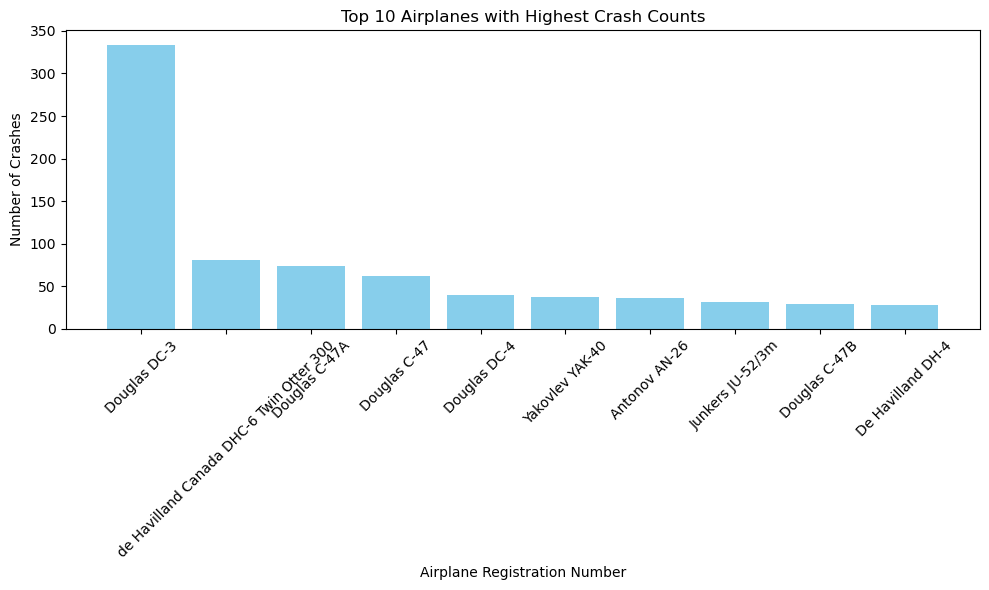

In [4]:
data.highest_crash_counts()

209


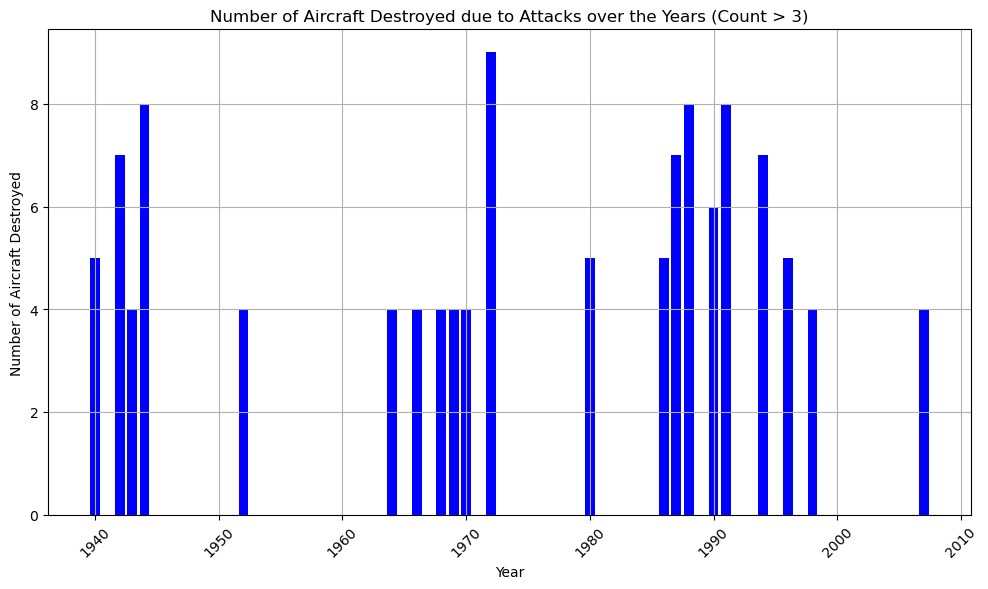

In [5]:
import matplotlib.pyplot as plt
from csv import DictReader
import numpy as np
from datetime import datetime


def unicena_letala():
    unicena = data.extract_data_from_summary(["shoot", "shot", "attack"], ["overshoot", "undershoot"])
    print(len(unicena))
    years, counts = np.unique([entry['Date'][-4:] for entry in unicena], return_counts=True)

    years_filtered = years[counts > 3]
    counts_filtered = counts[counts > 3]

    """for year,count in zip(years,counts):
        if(count>3):
            print(year,count)"""

    plt.figure(figsize=(10, 6))
    plt.bar(years_filtered.astype(int), counts_filtered, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Aircraft Destroyed')
    plt.title('Number of Aircraft Destroyed due to Attacks over the Years (Count > 3)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


unicena_letala()

**Faulty design**

In [6]:
extracted = data.extract_data_from_summary(["faulty design", "design flaw", "design deficiencies"], [])
print(len(extracted))


16


**Water**

In [7]:
extracted = data.extract_data_from_summary(["ocean", "water", "swamp", "sea", "river"], [])
print(len(extracted))


617


**Low fuel**

In [8]:
extracted = data.extract_data_from_summary(["low fuel", "fuel exhaustion", "ran out of fuel", "running out of fuel"], [])
print(len(extracted))


66


**Birds**

In [9]:
extracted = data.extract_data_from_summary(["bird", "geese", "flock"], [])
print(len(extracted))

12


### Uspešnost letalskih podjetij glede na število mrtvih, število potnikov in število letov

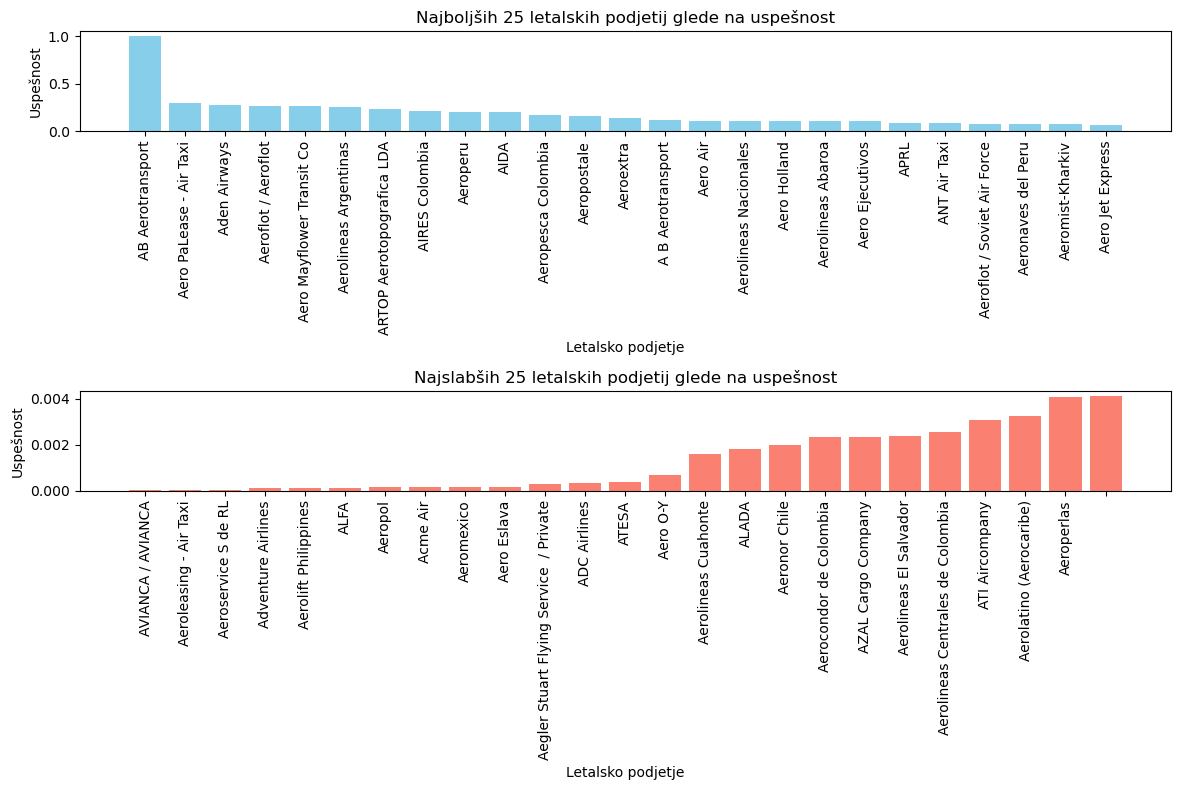

In [10]:
data.operator_performance()

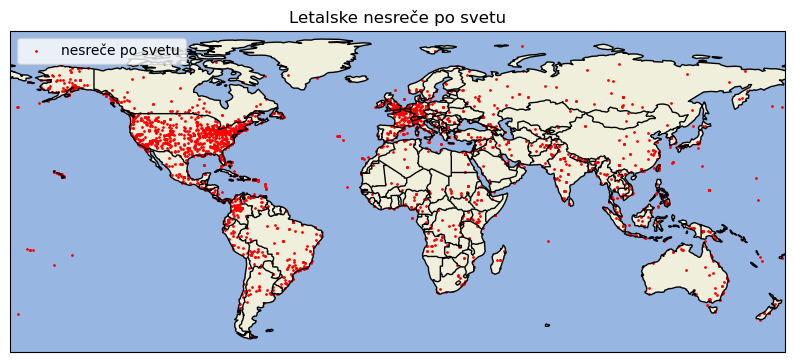

In [11]:
data.crash_locations_on_map()

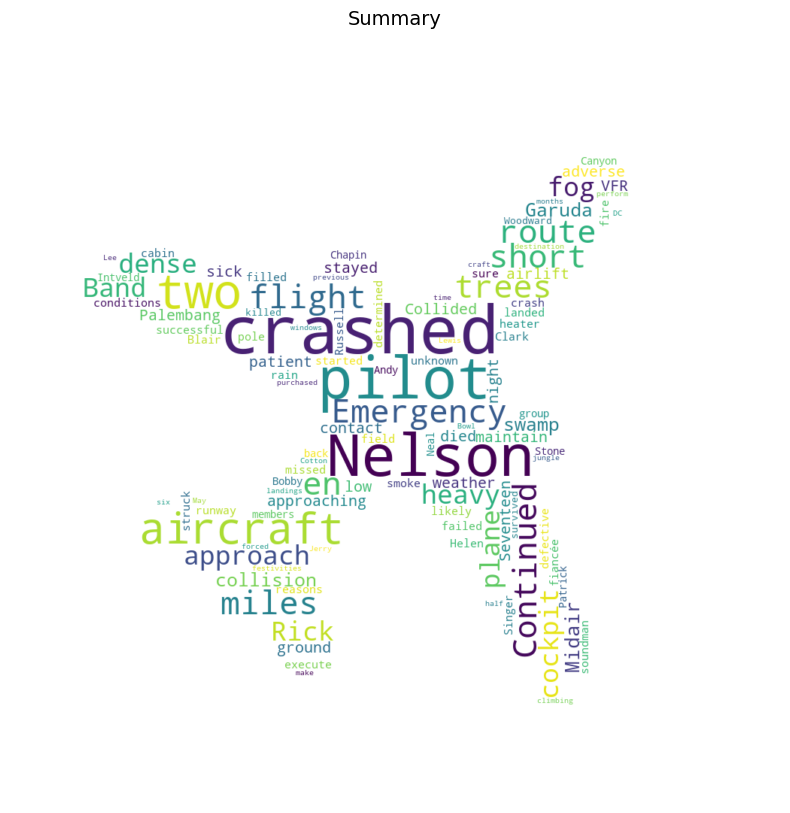

In [12]:
data.wordcloud('Summary')